In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
pprint(cities)

['chuy',
 'ushuaia',
 'kaitangata',
 'brenham',
 'naron',
 'east london',
 'dikson',
 'saint-augustin',
 'kiunga',
 'clyde river',
 'bambous virieux',
 'miandrivazo',
 'busselton',
 'sinnamary',
 'cockburn town',
 'rikitea',
 'hobart',
 'atuona',
 'bluff',
 'punta arenas',
 'samarai',
 'kalengwa',
 'butaritari',
 'georgetown',
 'tsogni',
 'maicao',
 'mataura',
 'kotma',
 'tsihombe',
 'kapaa',
 'barentsburg',
 'husavik',
 'hermanus',
 'provideniya',
 'pevek',
 'illoqqortoormiut',
 'yueyang',
 'touros',
 'sioux lookout',
 'lebu',
 'hithadhoo',
 'carnarvon',
 'saint-philippe',
 'kamen-rybolov',
 'barahona',
 'collie',
 'lamar',
 'pozo colorado',
 'port hardy',
 'ullapool',
 'praia da vitoria',
 'lagoa',
 'port alfred',
 'barcelos',
 'kodiak',
 'taolanaro',
 'sabak',
 'padang',
 'tumannyy',
 'monte cristi',
 'attawapiskat',
 'kenai',
 'esperance',
 'ribeira grande',
 'ahuimanu',
 'airai',
 'cap malheureux',
 'alofi',
 'chumikan',
 'roald',
 'tezpur',
 'barrow',
 'norman wells',
 'nikolskoy

## Perform API Calls

In [3]:
# # Starting URL for Weather Map API Call
url = 'http://api.openweathermap.org/data/2.5/weather?q=perth&units=imperial&appid=' + api_key
responses = requests.get(url).json()
print(json.dumps(responses, indent=2, sort_keys=True))



{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 56.4,
    "lon": -3.43
  },
  "dt": 1533865800,
  "id": 2640358,
  "main": {
    "humidity": 87,
    "pressure": 1011,
    "temp": 46.33,
    "temp_max": 48.2,
    "temp_min": 44.6
  },
  "name": "Perth",
  "sys": {
    "country": "GB",
    "id": 5134,
    "message": 0.0038,
    "sunrise": 1533875587,
    "sunset": 1533931418,
    "type": 1
  },
  "visibility": 10000,
  "weather": [
    {
      "description": "clear sky",
      "icon": "01n",
      "id": 800,
      "main": "Clear"
    }
  ],
  "wind": {
    "deg": 270,
    "speed": 4.7
  }
}


In [4]:
#Create variables to provide required data
City = [responses["name"]]
TempF = [responses["main"]["temp"]]
Humidity = [responses["main"]["humidity"]]
Cloudiness = [responses["clouds"]["all"]]
Windspeed_MPH = [responses["wind"]["speed"]]
Latitude = [responses["coord"]["lat"]]

print(City, TempF, Humidity, Windspeed_MPH, Cloudiness, Latitude)

['Perth'] [46.33] [87] [4.7] [0] [56.4]


In [5]:
#Create columns to hold retrieved data for temperature (in Fehrenheit), humidity, cloudiness, and windspeed (in mph) for the given city.


weather_data_df = pd.DataFrame({"City": cities, 
                                "Temperature (F)": "",
                                "Humidity": "",
                                "Windspeed (MPH)": "",
                                "Cloudiness": "",
                                "Latitude": ""})
#Trying to print the listing of cities and show newly created columns as Temperature..., etc. 


weather_data_df



,City,Temperature (F),Humidity,Windspeed (MPH),Cloudiness,Latitude
0,chuy,,,,,
1,ushuaia,,,,,
2,kaitangata,,,,,
3,brenham,,,,,
4,naron,,,,,
5,east london,,,,,
6,dikson,,,,,
7,saint-augustin,,,,,
8,kiunga,,,,,
9,clyde river,,,,,


In [6]:
# Loop through data (.iterrows) to retrieve data for temperature (in Fehrenheit), humidity, cloudiness, and windspeed (in mph) for the given city.
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=' + api_key


for index, row in weather_data_df.iterrows(): 

    # get city from df
    city_name = row['City']
    results = requests.get(base_url + "&q=" + city_name).json()
    print(json.dumps(results, indent=2, sort_keys=True))

    
#     print(f'Retrieving results for Index {index}: {city_name}.')
    
    try:
#         weather_data_df.loc[index, 'City'] = results[0]['City']
        weather_data_df.loc[index, 'Temperature (F)'] = results["main"]["temp"]
        weather_data_df.loc[index, 'Humidity'] = results["main"]["humidity"]
        weather_data_df.loc[index, 'Windspeed (MPH)'] = results["wind"]["speed"]
        weather_data_df.loc[index, 'Cloudiness'] = results["clouds"]["all"]
        weather_data_df.loc[index, 'Latitude'] = results["coord"]["lat"]
        
    except:
#           print()
       pass
   

  

{
  "base": "stations",
  "clouds": {
    "all": 92
  },
  "cod": 200,
  "coord": {
    "lat": -33.69,
    "lon": -53.46
  },
  "dt": 1533867005,
  "id": 3443061,
  "main": {
    "grnd_level": 1026.45,
    "humidity": 89,
    "pressure": 1026.45,
    "sea_level": 1027.95,
    "temp": 50.46,
    "temp_max": 50.46,
    "temp_min": 50.46
  },
  "name": "Chuy",
  "sys": {
    "country": "UY",
    "message": 0.0038,
    "sunrise": 1533896253,
    "sunset": 1533934870
  },
  "weather": [
    {
      "description": "overcast clouds",
      "icon": "04n",
      "id": 804,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 222.004,
    "speed": 23.62
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": -54.81,
    "lon": -68.31
  },
  "dt": 1533862800,
  "id": 3833367,
  "main": {
    "humidity": 52,
    "pressure": 1004,
    "temp": 46.4,
    "temp_max": 46.4,
    "temp_min": 46.4
  },
  "name": "Ushuaia",
  "sys": {
    "country": "AR",
   

{
  "base": "stations",
  "clouds": {
    "all": 20
  },
  "cod": 200,
  "coord": {
    "lat": 5.38,
    "lon": -52.96
  },
  "dt": 1533867007,
  "id": 3380290,
  "main": {
    "grnd_level": 1028.07,
    "humidity": 95,
    "pressure": 1028.07,
    "sea_level": 1029.45,
    "temp": 81.24,
    "temp_max": 81.24,
    "temp_min": 81.24
  },
  "name": "Sinnamary",
  "sys": {
    "country": "GF",
    "message": 0.003,
    "sunrise": 1533893265,
    "sunset": 1533937591
  },
  "weather": [
    {
      "description": "few clouds",
      "icon": "02n",
      "id": 801,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 97.5035,
    "speed": 10.76
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 20
  },
  "cod": 200,
  "coord": {
    "lat": 21.46,
    "lon": -71.14
  },
  "dt": 1533867007,
  "id": 3576994,
  "main": {
    "grnd_level": 1032.37,
    "humidity": 100,
    "pressure": 1032.37,
    "sea_level": 1032.37,
    "temp": 81.42,
    "temp_max": 81.42,
    "temp_min": 81.42
  },

{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": -46.19,
    "lon": 168.86
  },
  "dt": 1533867009,
  "id": 6201424,
  "main": {
    "grnd_level": 1021.02,
    "humidity": 84,
    "pressure": 1021.02,
    "sea_level": 1036.26,
    "temp": 51.9,
    "temp_max": 51.9,
    "temp_min": 51.9
  },
  "name": "Mataura",
  "sys": {
    "country": "NZ",
    "message": 0.0031,
    "sunrise": 1533844366,
    "sunset": 1533880066
  },
  "weather": [
    {
      "description": "clear sky",
      "icon": "01d",
      "id": 800,
      "main": "Clear"
    }
  ],
  "wind": {
    "deg": 320.504,
    "speed": 5.39
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 88
  },
  "cod": 200,
  "coord": {
    "lat": 23.2,
    "lon": 81.98
  },
  "dt": 1533867010,
  "id": 1265964,
  "main": {
    "grnd_level": 946.77,
    "humidity": 100,
    "pressure": 946.77,
    "sea_level": 1015.55,
    "temp": 76.2,
    "temp_max": 76.2,
    "temp_min": 76.2
  },
  "name": "K

{
  "base": "stations",
  "clouds": {
    "all": 92
  },
  "cod": 200,
  "coord": {
    "lat": 44.75,
    "lon": 132.04
  },
  "dt": 1533867011,
  "id": 2023226,
  "main": {
    "grnd_level": 1001.89,
    "humidity": 100,
    "pressure": 1001.89,
    "sea_level": 1017.25,
    "temp": 72.96,
    "temp_max": 72.96,
    "temp_min": 72.96
  },
  "name": "Kamen-Rybolov",
  "sys": {
    "country": "RU",
    "message": 0.011,
    "sunrise": 1533845261,
    "sunset": 1533896762
  },
  "weather": [
    {
      "description": "overcast clouds",
      "icon": "04d",
      "id": 804,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 211.004,
    "speed": 3.27
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 56
  },
  "cod": 200,
  "coord": {
    "lat": 18.21,
    "lon": -71.1
  },
  "dt": 1533867012,
  "id": 3492985,
  "main": {
    "grnd_level": 1030.1,
    "humidity": 100,
    "pressure": 1030.1,
    "sea_level": 1031.68,
    "temp": 79.62,
    "temp_max": 79.62,
    "temp_min": 79.

{
  "base": "stations",
  "clouds": {
    "all": 48
  },
  "cod": 200,
  "coord": {
    "lat": -0.92,
    "lon": 100.36
  },
  "dt": 1533867014,
  "id": 1633419,
  "main": {
    "grnd_level": 1020.62,
    "humidity": 100,
    "pressure": 1020.62,
    "sea_level": 1025.97,
    "temp": 82.23,
    "temp_max": 82.23,
    "temp_min": 82.23
  },
  "name": "Padang",
  "sys": {
    "country": "ID",
    "message": 0.0186,
    "sunrise": 1533856894,
    "sunset": 1533900381
  },
  "weather": [
    {
      "description": "scattered clouds",
      "icon": "03d",
      "id": 802,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 158.504,
    "speed": 2.59
  }
}
{
  "cod": "404",
  "message": "city not found"
}
{
  "cod": "404",
  "message": "city not found"
}
{
  "cod": "404",
  "message": "city not found"
}
{
  "base": "stations",
  "clouds": {
    "all": 1
  },
  "cod": 200,
  "coord": {
    "lat": 60.55,
    "lon": -151.26
  },
  "dt": 1533862560,
  "id": 5866063,
  "main": {
    "humidit

{
  "base": "stations",
  "clouds": {
    "all": 90
  },
  "cod": 200,
  "coord": {
    "lat": -40.91,
    "lon": -73.16
  },
  "dt": 1533862800,
  "id": 3874579,
  "main": {
    "humidity": 87,
    "pressure": 1017,
    "temp": 46.4,
    "temp_max": 46.4,
    "temp_min": 46.4
  },
  "name": "Purranque",
  "sys": {
    "country": "CL",
    "id": 4672,
    "message": 0.0036,
    "sunrise": 1533901727,
    "sunset": 1533938857,
    "type": 1
  },
  "visibility": 8000,
  "weather": [
    {
      "description": "light intensity shower rain",
      "icon": "09n",
      "id": 520,
      "main": "Rain"
    }
  ],
  "wind": {
    "deg": 350,
    "speed": 6.93
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 48.95,
    "lon": 4.24
  },
  "dt": 1533866400,
  "id": 2995603,
  "main": {
    "humidity": 93,
    "pressure": 1022,
    "temp": 55.56,
    "temp_max": 57.2,
    "temp_min": 53.6
  },
  "name": "Saint-Pierre",
  "sys": {
    "country": "F

{
  "base": "stations",
  "clouds": {
    "all": 68
  },
  "cod": 200,
  "coord": {
    "lat": 24.47,
    "lon": 54.37
  },
  "dt": 1533864960,
  "id": 292968,
  "main": {
    "humidity": 25,
    "pressure": 999,
    "temp": 97.81,
    "temp_max": 98.6,
    "temp_min": 96.8
  },
  "name": "Abu Dhabi",
  "sys": {
    "country": "AE",
    "id": 7095,
    "message": 0.0037,
    "sunrise": 1533866096,
    "sunset": 1533913232,
    "type": 1
  },
  "visibility": 7000,
  "weather": [
    {
      "description": "dust",
      "icon": "50n",
      "id": 761,
      "main": "Dust"
    }
  ],
  "wind": {
    "deg": 100,
    "speed": 6.93
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 40
  },
  "cod": 200,
  "coord": {
    "lat": 42.65,
    "lon": -73.75
  },
  "dt": 1533865860,
  "id": 5106834,
  "main": {
    "humidity": 60,
    "pressure": 1011,
    "temp": 70.32,
    "temp_max": 75.2,
    "temp_min": 68
  },
  "name": "Albany",
  "sys": {
    "country": "US",
    "id": 2088,
    "messag

{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 70.62,
    "lon": 147.9
  },
  "dt": 1533867021,
  "id": 2126123,
  "main": {
    "grnd_level": 1032.53,
    "humidity": 74,
    "pressure": 1032.53,
    "sea_level": 1034.52,
    "temp": 52.62,
    "temp_max": 52.62,
    "temp_min": 52.62
  },
  "name": "Chokurdakh",
  "sys": {
    "country": "RU",
    "message": 0.0047,
    "sunrise": 1533831801,
    "sunset": 1533902334
  },
  "weather": [
    {
      "description": "clear sky",
      "icon": "01d",
      "id": 800,
      "main": "Clear"
    }
  ],
  "wind": {
    "deg": 110.504,
    "speed": 14.79
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 80
  },
  "cod": 200,
  "coord": {
    "lat": -6.06,
    "lon": -77.17
  },
  "dt": 1533867021,
  "id": 3692863,
  "main": {
    "grnd_level": 868.39,
    "humidity": 100,
    "pressure": 868.39,
    "sea_level": 1030.22,
    "temp": 59.37,
    "temp_max": 59.37,
    "temp_min": 59.37
  },
  

{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 63.29,
    "lon": 118.35
  },
  "dt": 1533867023,
  "id": 2018735,
  "main": {
    "grnd_level": 1002.38,
    "humidity": 59,
    "pressure": 1002.38,
    "sea_level": 1023.21,
    "temp": 62.88,
    "temp_max": 62.88,
    "temp_min": 62.88
  },
  "name": "Nyurba",
  "sys": {
    "country": "RU",
    "message": 0.0255,
    "sunrise": 1533844033,
    "sunset": 1533904476
  },
  "weather": [
    {
      "description": "clear sky",
      "icon": "01d",
      "id": 800,
      "main": "Clear"
    }
  ],
  "wind": {
    "deg": 275.004,
    "speed": 6.4
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 56
  },
  "cod": 200,
  "coord": {
    "lat": 30.38,
    "lon": 78.48
  },
  "dt": 1533867023,
  "id": 1254808,
  "main": {
    "grnd_level": 782.79,
    "humidity": 100,
    "pressure": 782.79,
    "sea_level": 1017.5,
    "temp": 61.98,
    "temp_max": 61.98,
    "temp_min": 61.98
  },
  "name":

{
  "base": "stations",
  "clouds": {
    "all": 92
  },
  "cod": 200,
  "coord": {
    "lat": 16.91,
    "lon": 121.06
  },
  "dt": 1533867025,
  "id": 1727529,
  "main": {
    "grnd_level": 931.21,
    "humidity": 90,
    "pressure": 931.21,
    "sea_level": 1019.85,
    "temp": 74.4,
    "temp_max": 74.4,
    "temp_min": 74.4
  },
  "name": "Banaue",
  "sys": {
    "country": "PH",
    "message": 0.0031,
    "sunrise": 1533850683,
    "sunset": 1533896644
  },
  "weather": [
    {
      "description": "overcast clouds",
      "icon": "04d",
      "id": 804,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 210.504,
    "speed": 2.15
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 41.93,
    "lon": 19.22
  },
  "dt": 1533864600,
  "id": 3188516,
  "main": {
    "humidity": 57,
    "pressure": 1017,
    "temp": 75.02,
    "temp_max": 78.8,
    "temp_min": 71.6
  },
  "name": "Ulcinj",
  "sys": {
    "country": "ME",
    "id": 

{
  "base": "stations",
  "clouds": {
    "all": 75
  },
  "cod": 200,
  "coord": {
    "lat": 13.43,
    "lon": 75.26
  },
  "dt": 1533866400,
  "id": 1255633,
  "main": {
    "humidity": 94,
    "pressure": 1011,
    "temp": 77,
    "temp_max": 77,
    "temp_min": 77
  },
  "name": "Sringeri",
  "sys": {
    "country": "IN",
    "id": 7833,
    "message": 0.0048,
    "sunrise": 1533861932,
    "sunset": 1533907380,
    "type": 1
  },
  "visibility": 6000,
  "weather": [
    {
      "description": "broken clouds",
      "icon": "04d",
      "id": 803,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 300,
    "speed": 6.93
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 90
  },
  "cod": 200,
  "coord": {
    "lat": 17.01,
    "lon": 54.1
  },
  "dt": 1533862200,
  "id": 286621,
  "main": {
    "humidity": 100,
    "pressure": 1004,
    "temp": 77,
    "temp_max": 77,
    "temp_min": 77
  },
  "name": "Salalah",
  "sys": {
    "country": "OM",
    "id": 7115,
    "message

{
  "base": "stations",
  "clouds": {
    "all": 12
  },
  "cod": 200,
  "coord": {
    "lat": -35.71,
    "lon": 150.18
  },
  "dt": 1533867030,
  "id": 2176639,
  "main": {
    "grnd_level": 1005.3,
    "humidity": 65,
    "pressure": 1005.3,
    "sea_level": 1029.09,
    "temp": 62.25,
    "temp_max": 62.25,
    "temp_min": 62.25
  },
  "name": "Batemans Bay",
  "sys": {
    "country": "AU",
    "message": 0.0033,
    "sunrise": 1533847611,
    "sunset": 1533885777
  },
  "weather": [
    {
      "description": "few clouds",
      "icon": "02d",
      "id": 801,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 332.004,
    "speed": 8.52
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 31.58,
    "lon": 54.44
  },
  "dt": 1533862800,
  "id": 124274,
  "main": {
    "humidity": 17,
    "pressure": 1013,
    "temp": 73.4,
    "temp_max": 73.4,
    "temp_min": 73.4
  },
  "name": "Mehriz",
  "sys": {
    "country": "IR",
    "id

{
  "base": "stations",
  "clouds": {
    "all": 75
  },
  "cod": 200,
  "coord": {
    "lat": 34.68,
    "lon": 135.8
  },
  "dt": 1533864600,
  "id": 1855612,
  "main": {
    "humidity": 74,
    "pressure": 1004,
    "temp": 83.73,
    "temp_max": 84.2,
    "temp_min": 82.4
  },
  "name": "Nara",
  "sys": {
    "country": "JP",
    "id": 7514,
    "message": 0.0039,
    "sunrise": 1533845594,
    "sunset": 1533894640,
    "type": 1
  },
  "visibility": 10000,
  "weather": [
    {
      "description": "shower rain",
      "icon": "09d",
      "id": 521,
      "main": "Rain"
    }
  ],
  "wind": {
    "deg": 320,
    "speed": 4.7
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 38.88,
    "lon": 40.49
  },
  "dt": 1533867032,
  "id": 321082,
  "main": {
    "grnd_level": 857.85,
    "humidity": 75,
    "pressure": 857.85,
    "sea_level": 1022.56,
    "temp": 54.33,
    "temp_max": 54.33,
    "temp_min": 54.33
  },
  "name": "Bingol",


{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 58.01,
    "lon": 39.18
  },
  "dt": 1533867034,
  "id": 510442,
  "main": {
    "grnd_level": 1022.89,
    "humidity": 79,
    "pressure": 1022.89,
    "sea_level": 1038.08,
    "temp": 62.88,
    "temp_max": 62.88,
    "temp_min": 62.88
  },
  "name": "Pesochnoye",
  "sys": {
    "country": "RU",
    "message": 0.0035,
    "sunrise": 1533864913,
    "sunset": 1533921634
  },
  "weather": [
    {
      "description": "clear sky",
      "icon": "01d",
      "id": 800,
      "main": "Clear"
    }
  ],
  "wind": {
    "deg": 241.504,
    "speed": 9.42
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 90
  },
  "cod": 200,
  "coord": {
    "lat": 63.59,
    "lon": -135.9
  },
  "dt": 1533862800,
  "id": 6068416,
  "main": {
    "humidity": 93,
    "pressure": 1005,
    "temp": 50,
    "temp_max": 50,
    "temp_min": 50
  },
  "name": "Mayo",
  "sys": {
    "country": "CA",
    "id": 3955,
  

{
  "base": "stations",
  "clouds": {
    "all": 36
  },
  "cod": 200,
  "coord": {
    "lat": 53.8,
    "lon": -9.52
  },
  "dt": 1533867037,
  "id": 2960970,
  "main": {
    "grnd_level": 1019.97,
    "humidity": 93,
    "pressure": 1019.97,
    "sea_level": 1028.97,
    "temp": 52.44,
    "temp_max": 52.44,
    "temp_min": 52.44
  },
  "name": "Westport",
  "sys": {
    "country": "IE",
    "message": 0.0032,
    "sunrise": 1533877665,
    "sunset": 1533932274
  },
  "weather": [
    {
      "description": "scattered clouds",
      "icon": "03n",
      "id": 802,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 260.504,
    "speed": 9.42
  }
}
{
  "cod": "404",
  "message": "city not found"
}
{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 5.36,
    "lon": -74.39
  },
  "dt": 1533867037,
  "id": 3687505,
  "main": {
    "grnd_level": 914.1,
    "humidity": 71,
    "pressure": 914.1,
    "sea_level": 1023.9,
    "temp": 66.93,
   

{
  "base": "stations",
  "clouds": {
    "all": 88
  },
  "cod": 200,
  "coord": {
    "lat": -46.43,
    "lon": -67.52
  },
  "dt": 1533867039,
  "id": 3863379,
  "main": {
    "grnd_level": 1006.19,
    "humidity": 61,
    "pressure": 1006.19,
    "sea_level": 1027.95,
    "temp": 47.67,
    "temp_max": 47.67,
    "temp_min": 47.67
  },
  "name": "Mar del Plata",
  "sys": {
    "country": "AR",
    "message": 0.0031,
    "sunrise": 1533901071,
    "sunset": 1533936811
  },
  "weather": [
    {
      "description": "overcast clouds",
      "icon": "04n",
      "id": 804,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 355.504,
    "speed": 5.61
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 48.45,
    "lon": 27.42
  },
  "dt": 1533867039,
  "id": 693284,
  "main": {
    "grnd_level": 1010.73,
    "humidity": 67,
    "pressure": 1010.73,
    "sea_level": 1039.3,
    "temp": 57.75,
    "temp_max": 57.75,
    "temp_min": 57.7

{
  "base": "stations",
  "clouds": {
    "all": 80
  },
  "cod": 200,
  "coord": {
    "lat": 18.82,
    "lon": 95.22
  },
  "dt": 1533866778,
  "id": 1299154,
  "main": {
    "grnd_level": 1013.4,
    "humidity": 95,
    "pressure": 1013.4,
    "sea_level": 1019.04,
    "temp": 80.97,
    "temp_max": 80.97,
    "temp_min": 80.97
  },
  "name": "Pyay",
  "sys": {
    "country": "MM",
    "message": 0.0034,
    "sunrise": 1533856741,
    "sunset": 1533902987
  },
  "weather": [
    {
      "description": "broken clouds",
      "icon": "04d",
      "id": 803,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 133.504,
    "speed": 4.72
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 44
  },
  "cod": 200,
  "coord": {
    "lat": 63.05,
    "lon": 179.32
  },
  "dt": 1533867041,
  "id": 2126710,
  "main": {
    "grnd_level": 1020.7,
    "humidity": 99,
    "pressure": 1020.7,
    "sea_level": 1028.52,
    "temp": 47.4,
    "temp_max": 47.4,
    "temp_min": 47.4
  },
  "name":

{
  "base": "stations",
  "clouds": {
    "all": 75
  },
  "cod": 200,
  "coord": {
    "lat": 16.86,
    "lon": -99.88
  },
  "dt": 1533862020,
  "id": 3533462,
  "main": {
    "humidity": 74,
    "pressure": 1011,
    "temp": 84.2,
    "temp_max": 84.2,
    "temp_min": 84.2
  },
  "name": "Acapulco",
  "sys": {
    "country": "MX",
    "id": 3965,
    "message": 0.0041,
    "sunrise": 1533903721,
    "sunset": 1533949646,
    "type": 1
  },
  "visibility": 11265,
  "weather": [
    {
      "description": "broken clouds",
      "icon": "04n",
      "id": 803,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 270,
    "speed": 6.93
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 75
  },
  "cod": 200,
  "coord": {
    "lat": 5.28,
    "lon": 115.24
  },
  "dt": 1533866400,
  "id": 1733782,
  "main": {
    "humidity": 83,
    "pressure": 1011,
    "temp": 85.19,
    "temp_max": 86,
    "temp_min": 84.2
  },
  "name": "Victoria",
  "sys": {
    "country": "BN",
    "id": 811

{
  "base": "stations",
  "clouds": {
    "all": 90
  },
  "cod": 200,
  "coord": {
    "lat": 49.78,
    "lon": -74.86
  },
  "dt": 1533862800,
  "id": 5919850,
  "main": {
    "humidity": 76,
    "pressure": 1009,
    "temp": 57.2,
    "temp_max": 57.2,
    "temp_min": 57.2
  },
  "name": "Chapais",
  "sys": {
    "country": "CA",
    "id": 3777,
    "message": 0.0157,
    "sunrise": 1533894155,
    "sunset": 1533947156,
    "type": 1
  },
  "visibility": 14484,
  "weather": [
    {
      "description": "overcast clouds",
      "icon": "04n",
      "id": 804,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 300,
    "gust": 10.8,
    "speed": 10.29
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 40
  },
  "cod": 200,
  "coord": {
    "lat": 59.7,
    "lon": 150.17
  },
  "dt": 1533864600,
  "id": 2127060,
  "main": {
    "humidity": 56,
    "pressure": 1011,
    "temp": 69.8,
    "temp_max": 69.8,
    "temp_min": 69.8
  },
  "name": "Arman",
  "sys": {
    "country": "

{
  "base": "stations",
  "clouds": {
    "all": 75
  },
  "cod": 200,
  "coord": {
    "lat": 43.32,
    "lon": 145.57
  },
  "dt": 1533862800,
  "id": 2128975,
  "main": {
    "humidity": 100,
    "pressure": 1004,
    "temp": 60.8,
    "temp_max": 60.8,
    "temp_min": 60.8
  },
  "name": "Nemuro",
  "sys": {
    "country": "JP",
    "id": 7526,
    "message": 0.0036,
    "sunrise": 1533842213,
    "sunset": 1533893318,
    "type": 1
  },
  "visibility": 1500,
  "weather": [
    {
      "description": "light intensity drizzle",
      "icon": "09d",
      "id": 300,
      "main": "Drizzle"
    },
    {
      "description": "mist",
      "icon": "50d",
      "id": 701,
      "main": "Mist"
    }
  ],
  "wind": {
    "deg": 30,
    "speed": 12.75
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 90
  },
  "cod": 200,
  "coord": {
    "lat": 60.79,
    "lon": -161.76
  },
  "dt": 1533862380,
  "id": 5880568,
  "main": {
    "humidity": 81,
    "pressure": 1015,
    "temp": 53.6,
  

{
  "base": "stations",
  "clouds": {
    "all": 92
  },
  "cod": 200,
  "coord": {
    "lat": -16.84,
    "lon": 36.99
  },
  "dt": 1533867052,
  "id": 1024312,
  "main": {
    "grnd_level": 1013.16,
    "humidity": 97,
    "pressure": 1013.16,
    "sea_level": 1033.02,
    "temp": 68.55,
    "temp_max": 68.55,
    "temp_min": 68.55
  },
  "name": "Mocuba",
  "rain": {
    "3h": 0.275
  },
  "sys": {
    "country": "MZ",
    "message": 0.0031,
    "sunrise": 1533873190,
    "sunset": 1533914510
  },
  "weather": [
    {
      "description": "light rain",
      "icon": "10n",
      "id": 500,
      "main": "Rain"
    }
  ],
  "wind": {
    "deg": 18.0035,
    "speed": 3.6
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": -23.7,
    "lon": 133.88
  },
  "dt": 1533862800,
  "id": 2077895,
  "main": {
    "humidity": 12,
    "pressure": 1018,
    "temp": 69.8,
    "temp_max": 69.8,
    "temp_min": 69.8
  },
  "name": "Alice Springs",
  "sy

{
  "cod": "404",
  "message": "city not found"
}
{
  "base": "stations",
  "clouds": {
    "all": 40
  },
  "cod": 200,
  "coord": {
    "lat": -18.65,
    "lon": -173.98
  },
  "dt": 1533862800,
  "id": 4032420,
  "main": {
    "humidity": 61,
    "pressure": 1011,
    "temp": 77,
    "temp_max": 77,
    "temp_min": 77
  },
  "name": "Neiafu",
  "sys": {
    "country": "TO",
    "id": 8332,
    "message": 0.0037,
    "sunrise": 1533923934,
    "sunset": 1533965022,
    "type": 1
  },
  "visibility": 10000,
  "weather": [
    {
      "description": "scattered clouds",
      "icon": "03n",
      "id": 802,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 210,
    "speed": 5.82
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 48
  },
  "cod": 200,
  "coord": {
    "lat": 50.72,
    "lon": 136.64
  },
  "dt": 1533866969,
  "id": 2016307,
  "main": {
    "grnd_level": 999.46,
    "humidity": 76,
    "pressure": 999.46,
    "sea_level": 1019.04,
    "temp": 72.33,
    "temp_m

{
  "base": "stations",
  "clouds": {
    "all": 40
  },
  "cod": 200,
  "coord": {
    "lat": 37.52,
    "lon": 140.86
  },
  "dt": 1533862800,
  "id": 2111704,
  "main": {
    "humidity": 74,
    "pressure": 1005,
    "temp": 86,
    "temp_max": 86,
    "temp_min": 86
  },
  "name": "Namie",
  "sys": {
    "country": "JP",
    "id": 7594,
    "message": 0.0067,
    "sunrise": 1533844069,
    "sunset": 1533893733,
    "type": 1
  },
  "visibility": 10000,
  "weather": [
    {
      "description": "scattered clouds",
      "icon": "03d",
      "id": 802,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 330,
    "speed": 9.17
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 8
  },
  "cod": 200,
  "coord": {
    "lat": -10.7,
    "lon": -48.41
  },
  "dt": 1533867056,
  "id": 3452711,
  "main": {
    "grnd_level": 996.95,
    "humidity": 63,
    "pressure": 996.95,
    "sea_level": 1026.74,
    "temp": 78.36,
    "temp_max": 78.36,
    "temp_min": 78.36
  },
  "name": "Port

{
  "base": "stations",
  "clouds": {
    "all": 8
  },
  "cod": 200,
  "coord": {
    "lat": 25.81,
    "lon": 113.03
  },
  "dt": 1533867059,
  "id": 1815059,
  "main": {
    "grnd_level": 979.03,
    "humidity": 95,
    "pressure": 979.03,
    "sea_level": 1016.81,
    "temp": 86.73,
    "temp_max": 86.73,
    "temp_min": 86.73
  },
  "name": "Chenzhou",
  "sys": {
    "country": "CN",
    "message": 0.0038,
    "sunrise": 1533851899,
    "sunset": 1533899274
  },
  "weather": [
    {
      "description": "clear sky",
      "icon": "02d",
      "id": 800,
      "main": "Clear"
    }
  ],
  "wind": {
    "deg": 99.0035,
    "speed": 3.94
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 56
  },
  "cod": 200,
  "coord": {
    "lat": -4.88,
    "lon": -66.9
  },
  "dt": 1533867059,
  "id": 3664659,
  "main": {
    "grnd_level": 1019.97,
    "humidity": 94,
    "pressure": 1019.97,
    "sea_level": 1028.15,
    "temp": 75.03,
    "temp_max": 75.03,
    "temp_min": 75.03
  },
  "nam

{
  "base": "stations",
  "clouds": {
    "all": 75
  },
  "cod": 200,
  "coord": {
    "lat": 41.36,
    "lon": -87.44
  },
  "dt": 1533865500,
  "id": 4918805,
  "main": {
    "humidity": 88,
    "pressure": 1014,
    "temp": 75.79,
    "temp_max": 80.6,
    "temp_min": 69.8
  },
  "name": "Cedar Lake",
  "sys": {
    "country": "US",
    "id": 1030,
    "message": 0.0045,
    "sunrise": 1533898435,
    "sunset": 1533948933,
    "type": 1
  },
  "visibility": 16093,
  "weather": [
    {
      "description": "light rain",
      "icon": "10n",
      "id": 500,
      "main": "Rain"
    },
    {
      "description": "thunderstorm",
      "icon": "11n",
      "id": 211,
      "main": "Thunderstorm"
    }
  ],
  "wind": {
    "deg": 350,
    "speed": 4.7
  }
}
{
  "cod": "404",
  "message": "city not found"
}
{
  "base": "stations",
  "clouds": {
    "all": 24
  },
  "cod": 200,
  "coord": {
    "lat": -0.28,
    "lon": 20.88
  },
  "dt": 1533867061,
  "id": 218680,
  "main": {
    "grnd_l

{
  "base": "stations",
  "clouds": {
    "all": 80
  },
  "cod": 200,
  "coord": {
    "lat": 6.71,
    "lon": -61.64
  },
  "dt": 1533867064,
  "id": 3644689,
  "main": {
    "grnd_level": 995.16,
    "humidity": 99,
    "pressure": 995.16,
    "sea_level": 1029.98,
    "temp": 69.45,
    "temp_max": 69.45,
    "temp_min": 69.45
  },
  "name": "El Dorado",
  "rain": {
    "3h": 7.58
  },
  "sys": {
    "country": "VE",
    "message": 0.0031,
    "sunrise": 1533895258,
    "sunset": 1533939763
  },
  "weather": [
    {
      "description": "moderate rain",
      "icon": "10n",
      "id": 501,
      "main": "Rain"
    }
  ],
  "wind": {
    "deg": 147.004,
    "speed": 1.92
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 92
  },
  "cod": 200,
  "coord": {
    "lat": 55.53,
    "lon": 70.34
  },
  "dt": 1533867064,
  "id": 1491719,
  "main": {
    "grnd_level": 1001.32,
    "humidity": 99,
    "pressure": 1001.32,
    "sea_level": 1016.4,
    "temp": 62.88,
    "temp_max": 62.88

{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": -25.24,
    "lon": 130.99
  },
  "dt": 1533866400,
  "id": 6355222,
  "main": {
    "humidity": 10,
    "pressure": 1015,
    "temp": 71.6,
    "temp_max": 71.6,
    "temp_min": 71.6
  },
  "name": "Yulara",
  "sys": {
    "country": "AU",
    "id": 8160,
    "message": 0.003,
    "sunrise": 1533851277,
    "sunset": 1533891313,
    "type": 1
  },
  "visibility": 10000,
  "weather": [
    {
      "description": "clear sky",
      "icon": "01d",
      "id": 800,
      "main": "Clear"
    }
  ],
  "wind": {
    "deg": 300,
    "speed": 11.41
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": -11.09,
    "lon": -43.14
  },
  "dt": 1533867067,
  "id": 3470821,
  "main": {
    "grnd_level": 976.44,
    "humidity": 61,
    "pressure": 976.44,
    "sea_level": 1029.33,
    "temp": 71.7,
    "temp_max": 71.7,
    "temp_min": 71.7
  },
  "name": "Barra",

{
  "base": "stations",
  "clouds": {
    "all": 40
  },
  "cod": 200,
  "coord": {
    "lat": 32.3,
    "lon": -64.78
  },
  "dt": 1533862500,
  "id": 3573197,
  "main": {
    "humidity": 78,
    "pressure": 1018,
    "temp": 80.6,
    "temp_max": 80.6,
    "temp_min": 80.6
  },
  "name": "Hamilton",
  "sys": {
    "country": "BM",
    "id": 4169,
    "message": 0.0045,
    "sunrise": 1533893998,
    "sunset": 1533942508,
    "type": 1
  },
  "visibility": 10000,
  "weather": [
    {
      "description": "scattered clouds",
      "icon": "03n",
      "id": 802,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 210,
    "speed": 12.75
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 1
  },
  "cod": 200,
  "coord": {
    "lat": 49.75,
    "lon": 8.12
  },
  "dt": 1533866160,
  "id": 2956710,
  "main": {
    "humidity": 67,
    "pressure": 1020,
    "temp": 57.96,
    "temp_max": 62.6,
    "temp_min": 53.6
  },
  "name": "Alzey",
  "sys": {
    "country": "DE",
    "id": 498

{
  "base": "stations",
  "clouds": {
    "all": 92
  },
  "cod": 200,
  "coord": {
    "lat": 34.66,
    "lon": 112.42
  },
  "dt": 1533867072,
  "id": 1801792,
  "main": {
    "grnd_level": 978.14,
    "humidity": 100,
    "pressure": 978.14,
    "sea_level": 1020.33,
    "temp": 75.48,
    "temp_max": 75.48,
    "temp_min": 75.48
  },
  "name": "Luoyang",
  "rain": {
    "3h": 8.135
  },
  "sys": {
    "country": "CN",
    "message": 0.0031,
    "sunrise": 1533851210,
    "sunset": 1533900245
  },
  "weather": [
    {
      "description": "moderate rain",
      "icon": "10d",
      "id": 501,
      "main": "Rain"
    }
  ],
  "wind": {
    "deg": 46.0035,
    "speed": 4.16
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 88
  },
  "cod": 200,
  "coord": {
    "lat": -11.94,
    "lon": -38.08
  },
  "dt": 1533867072,
  "id": 3464100,
  "main": {
    "grnd_level": 1024.91,
    "humidity": 97,
    "pressure": 1024.91,
    "sea_level": 1031.68,
    "temp": 73.05,
    "temp_max": 7

{
  "base": "stations",
  "clouds": {
    "all": 32
  },
  "cod": 200,
  "coord": {
    "lat": 42.47,
    "lon": -2.45
  },
  "dt": 1533866400,
  "id": 3118150,
  "main": {
    "humidity": 82,
    "pressure": 1025,
    "temp": 51.51,
    "temp_max": 55.4,
    "temp_min": 48.2
  },
  "name": "Logrono",
  "sys": {
    "country": "ES",
    "id": 5487,
    "message": 0.0035,
    "sunrise": 1533877879,
    "sunset": 1533928696,
    "type": 1
  },
  "visibility": 10000,
  "weather": [
    {
      "description": "scattered clouds",
      "icon": "03n",
      "id": 802,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 290,
    "speed": 4.7
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 68
  },
  "cod": 200,
  "coord": {
    "lat": 25.6,
    "lon": 100.24
  },
  "dt": 1533867075,
  "id": 1814093,
  "main": {
    "grnd_level": 785.79,
    "humidity": 100,
    "pressure": 785.79,
    "sea_level": 1017.82,
    "temp": 63.78,
    "temp_max": 63.78,
    "temp_min": 63.78
  },
  "name

{
  "base": "stations",
  "clouds": {
    "all": 8
  },
  "cod": 200,
  "coord": {
    "lat": 58.36,
    "lon": 40.69
  },
  "dt": 1533867077,
  "id": 532600,
  "main": {
    "grnd_level": 1023.29,
    "humidity": 80,
    "pressure": 1023.29,
    "sea_level": 1037.96,
    "temp": 58.47,
    "temp_max": 58.47,
    "temp_min": 58.47
  },
  "name": "Lyubim",
  "sys": {
    "country": "RU",
    "message": 0.0034,
    "sunrise": 1533864450,
    "sunset": 1533921371
  },
  "weather": [
    {
      "description": "clear sky",
      "icon": "02d",
      "id": 800,
      "main": "Clear"
    }
  ],
  "wind": {
    "deg": 224.504,
    "speed": 9.31
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": 47.96,
    "lon": 80.43
  },
  "dt": 1533867077,
  "id": 1525988,
  "main": {
    "grnd_level": 939.56,
    "humidity": 41,
    "pressure": 939.56,
    "sea_level": 1022.24,
    "temp": 77.1,
    "temp_max": 77.1,
    "temp_min": 77.1
  },
  "name": "Aya

{
  "cod": "404",
  "message": "city not found"
}
{
  "base": "stations",
  "clouds": {
    "all": 40
  },
  "cod": 200,
  "coord": {
    "lat": -28,
    "lon": 153.41
  },
  "dt": 1533866400,
  "id": 2165087,
  "main": {
    "humidity": 46,
    "pressure": 1022,
    "temp": 69.8,
    "temp_max": 69.8,
    "temp_min": 69.8
  },
  "name": "Gold Coast",
  "sys": {
    "country": "AU",
    "id": 8165,
    "message": 0.0037,
    "sunrise": 1533846127,
    "sunset": 1533885704,
    "type": 1
  },
  "visibility": 10000,
  "weather": [
    {
      "description": "scattered clouds",
      "icon": "03d",
      "id": 802,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 150,
    "speed": 9.17
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 90
  },
  "cod": 200,
  "coord": {
    "lat": -13.71,
    "lon": -76.2
  },
  "dt": 1533862800,
  "id": 3932145,
  "main": {
    "humidity": 87,
    "pressure": 1014,
    "temp": 60.8,
    "temp_max": 60.8,
    "temp_min": 60.8
  },
  "name": "P

{
  "base": "stations",
  "clouds": {
    "all": 1
  },
  "cod": 200,
  "coord": {
    "lat": 35.37,
    "lon": -120.85
  },
  "dt": 1533862560,
  "id": 5374920,
  "main": {
    "humidity": 41,
    "pressure": 1012,
    "temp": 81.55,
    "temp_max": 93.2,
    "temp_min": 73.4
  },
  "name": "Morro Bay",
  "sys": {
    "country": "US",
    "id": 481,
    "message": 0.0042,
    "sunrise": 1533907150,
    "sunset": 1533956262,
    "type": 1
  },
  "visibility": 16093,
  "weather": [
    {
      "description": "clear sky",
      "icon": "01n",
      "id": 800,
      "main": "Clear"
    }
  ],
  "wind": {
    "deg": 300,
    "speed": 12.75
  }
}
{
  "cod": "404",
  "message": "city not found"
}
{
  "base": "stations",
  "clouds": {
    "all": 8
  },
  "cod": 200,
  "coord": {
    "lat": 50.73,
    "lon": 92.07
  },
  "dt": 1533867082,
  "id": 1503796,
  "main": {
    "grnd_level": 849.01,
    "humidity": 55,
    "pressure": 849.01,
    "sea_level": 1023.33,
    "temp": 67.11,
    "temp_max

{
  "base": "stations",
  "clouds": {
    "all": 44
  },
  "cod": 200,
  "coord": {
    "lat": 68.82,
    "lon": -51.19
  },
  "dt": 1533865800,
  "id": 3420768,
  "main": {
    "humidity": 93,
    "pressure": 1009,
    "temp": 37.4,
    "temp_max": 37.4,
    "temp_min": 37.4
  },
  "name": "Qasigiannguit",
  "sys": {
    "country": "GL",
    "id": 4805,
    "message": 0.0041,
    "sunrise": 1533881557,
    "sunset": 1533948222,
    "type": 1
  },
  "weather": [
    {
      "description": "scattered clouds",
      "icon": "03n",
      "id": 802,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 360,
    "speed": 5.82
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 20
  },
  "cod": 200,
  "coord": {
    "lat": 33.97,
    "lon": 130.94
  },
  "dt": 1533864600,
  "id": 1852225,
  "main": {
    "humidity": 62,
    "pressure": 1003,
    "temp": 84.76,
    "temp_max": 87.8,
    "temp_min": 82.4
  },
  "name": "Shimonoseki",
  "sys": {
    "country": "JP",
    "id": 7546,
    "m

{
  "base": "stations",
  "clouds": {
    "all": 24
  },
  "cod": 200,
  "coord": {
    "lat": 4.99,
    "lon": 19.98
  },
  "dt": 1533867087,
  "id": 2385535,
  "main": {
    "grnd_level": 967.44,
    "humidity": 95,
    "pressure": 967.44,
    "sea_level": 1025.6,
    "temp": 70.53,
    "temp_max": 70.53,
    "temp_min": 70.53
  },
  "name": "Kouango",
  "sys": {
    "country": "CF",
    "message": 0.0031,
    "sunrise": 1533875786,
    "sunset": 1533920063
  },
  "weather": [
    {
      "description": "few clouds",
      "icon": "02n",
      "id": 801,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 193.504,
    "speed": 3.94
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": -38.01,
    "lon": 177.29
  },
  "dt": 1533867087,
  "id": 2208332,
  "main": {
    "grnd_level": 1031.64,
    "humidity": 100,
    "pressure": 1031.64,
    "sea_level": 1033.5,
    "temp": 57.12,
    "temp_max": 57.12,
    "temp_min": 57.12
  },
  "nam

{
  "base": "stations",
  "clouds": {
    "all": 20
  },
  "cod": 200,
  "coord": {
    "lat": 32.81,
    "lon": -98.11
  },
  "dt": 1533866460,
  "id": 4711647,
  "main": {
    "humidity": 65,
    "pressure": 1015,
    "temp": 81.28,
    "temp_max": 84.2,
    "temp_min": 78.8
  },
  "name": "Mineral Wells",
  "sys": {
    "country": "US",
    "id": 2684,
    "message": 0.0045,
    "sunrise": 1533901951,
    "sunset": 1533950551,
    "type": 1
  },
  "visibility": 14484,
  "weather": [
    {
      "description": "moderate rain",
      "icon": "10n",
      "id": 501,
      "main": "Rain"
    }
  ],
  "wind": {
    "deg": 70.0035,
    "speed": 3.04
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 92
  },
  "cod": 200,
  "coord": {
    "lat": -21.55,
    "lon": 167.88
  },
  "dt": 1533866936,
  "id": 2138285,
  "main": {
    "grnd_level": 1027.83,
    "humidity": 92,
    "pressure": 1027.83,
    "sea_level": 1028.44,
    "temp": 72.24,
    "temp_max": 72.24,
    "temp_min": 72.24
  

{
  "base": "stations",
  "clouds": {
    "all": 75
  },
  "cod": 200,
  "coord": {
    "lat": 47.8,
    "lon": 67.71
  },
  "dt": 1533864600,
  "id": 1516589,
  "main": {
    "humidity": 31,
    "pressure": 1006,
    "temp": 73.4,
    "temp_max": 73.4,
    "temp_min": 73.4
  },
  "name": "Zhezkazgan",
  "sys": {
    "country": "KZ",
    "id": 7201,
    "message": 0.0058,
    "sunrise": 1533860243,
    "sunset": 1533912647,
    "type": 1
  },
  "visibility": 10000,
  "weather": [
    {
      "description": "broken clouds",
      "icon": "04d",
      "id": 803,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 220,
    "speed": 8.95
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 0
  },
  "cod": 200,
  "coord": {
    "lat": -34.67,
    "lon": 150.86
  },
  "dt": 1533862800,
  "id": 2161515,
  "main": {
    "humidity": 56,
    "pressure": 1019,
    "temp": 64.4,
    "temp_max": 64.4,
    "temp_min": 64.4
  },
  "name": "Kiama",
  "sys": {
    "country": "AU",
    "id": 8231

{
  "base": "stations",
  "clouds": {
    "all": 48
  },
  "cod": 200,
  "coord": {
    "lat": 50.68,
    "lon": 156.12
  },
  "dt": 1533867094,
  "id": 2121385,
  "main": {
    "grnd_level": 1010.73,
    "humidity": 91,
    "pressure": 1010.73,
    "sea_level": 1023.82,
    "temp": 56.4,
    "temp_max": 56.4,
    "temp_min": 56.4
  },
  "name": "Severo-Kurilsk",
  "sys": {
    "country": "RU",
    "message": 0.0041,
    "sunrise": 1533838499,
    "sunset": 1533891952
  },
  "weather": [
    {
      "description": "scattered clouds",
      "icon": "03d",
      "id": 802,
      "main": "Clouds"
    }
  ],
  "wind": {
    "deg": 304.004,
    "speed": 3.71
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 90
  },
  "cod": 200,
  "coord": {
    "lat": -29.69,
    "lon": -53.81
  },
  "dt": 1533862800,
  "id": 3450083,
  "main": {
    "humidity": 81,
    "pressure": 1018,
    "temp": 51.8,
    "temp_max": 51.8,
    "temp_min": 51.8
  },
  "name": "Santa Maria",
  "sys": {
    "country"

{
  "base": "stations",
  "clouds": {
    "all": 1
  },
  "cod": 200,
  "coord": {
    "lat": 52.41,
    "lon": -108.71
  },
  "dt": 1533862800,
  "id": 6182001,
  "main": {
    "humidity": 43,
    "pressure": 1014,
    "temp": 87.8,
    "temp_max": 87.8,
    "temp_min": 87.8
  },
  "name": "Wilkie",
  "sys": {
    "country": "CA",
    "id": 3925,
    "message": 0.0038,
    "sunrise": 1533901791,
    "sunset": 1533955760,
    "type": 1
  },
  "visibility": 11265,
  "weather": [
    {
      "description": "clear sky",
      "icon": "01n",
      "id": 800,
      "main": "Clear"
    }
  ],
  "wind": {
    "deg": 200,
    "speed": 4.7
  }
}
{
  "base": "stations",
  "clouds": {
    "all": 90
  },
  "cod": 200,
  "coord": {
    "lat": 60.72,
    "lon": -135.06
  },
  "dt": 1533862800,
  "id": 6180550,
  "main": {
    "humidity": 87,
    "pressure": 1004,
    "temp": 53.6,
    "temp_max": 53.6,
    "temp_min": 53.6
  },
  "name": "Whitehorse",
  "sys": {
    "country": "CA",
    "id": 3963,


In [13]:
#Drop the na values
CleanWeatherData = weather_data_df
CleanWeatherData.replace("", np.nan, inplace=True)
CleanWeatherData.dropna()
CleanWeatherData

,City,Temperature (F),Humidity,Windspeed (MPH),Cloudiness,Latitude
0,chuy,50.46,89.0,23.62,92.0,-33.69
1,ushuaia,46.40,52.0,8.05,0.0,-54.81
2,kaitangata,51.90,80.0,8.08,0.0,-46.28
3,brenham,84.20,66.0,4.70,1.0,30.17
4,naron,53.60,93.0,5.82,32.0,43.52
5,east london,57.93,100.0,11.99,80.0,-33.02
6,dikson,49.56,81.0,15.57,92.0,73.51
7,saint-augustin,56.39,100.0,2.71,20.0,44.83
8,kiunga,78.90,87.0,2.93,56.0,-6.12
9,clyde river,41.00,100.0,12.75,90.0,70.47


In [15]:
#Save data to .csv file

CleanWeatherData.to_csv("Weather_Data.csv", encoding="utf-8", index=False)

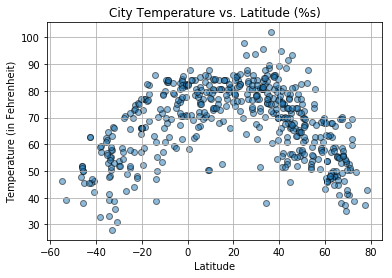

In [9]:
# Create scatter plot for Temperature vs. latitude
plt.scatter(CleanWeatherData["Latitude"],
            CleanWeatherData["Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.5, label="Cities")

# Plot the graph for Temp. vs. Lat.
plt.title("City Temperature vs. Latitude (%s)")
plt.ylabel("Temperature (in Fehrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save as .png file
plt.savefig("output_data/Temp.png")

# Show plot
plt.show()

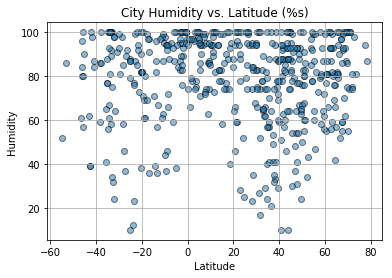

In [10]:
# Create scatter plot for Humidity vs. Latitude
plt.scatter(CleanWeatherData["Latitude"], 
            CleanWeatherData["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.5, label="Cities")

# Plot the graph for Humidity. vs. Lat.
plt.title("City Humidity vs. Latitude (%s)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save as .png file
plt.savefig("output_data/Humidity.png")

# Show plot
plt.show()

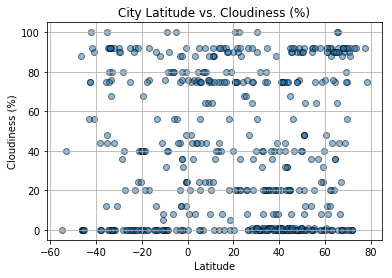

In [11]:
# Create a scatter plot for Cloudiness vs. Latitude
plt.scatter(CleanWeatherData["Latitude"],
            CleanWeatherData["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.5, label="Cities")
#Plot the graph for Cloudiness vs. Lat. 
plt.title("City Latitude vs. Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save as .png file
plt.savefig("output_data/Cloudiness.png")

# Show plot
plt.show()

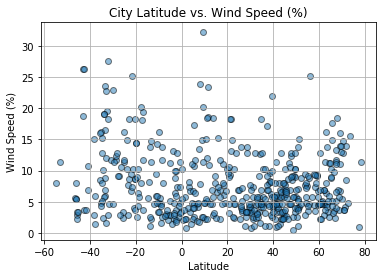

In [16]:
# Create a scatter plot for Wind Speed (MPH) vs. Latitude
plt.scatter(CleanWeatherData["Latitude"],
            CleanWeatherData["Windspeed (MPH)"], 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.5, label="Cities")
#Plot the graph for Wind Speed vs. Lat. 
plt.title("City Latitude vs. Wind Speed (%)")
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save as .png file
plt.savefig("output_data/WindSpeed.png")

# Show plot
plt.show()